In [2]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
#import plot_recipes as pr
import matplotlib.cm  as cm

In [2]:
# import numpy as np
# import matplotlib.pyplot as plt
# from netCDF4 import Dataset
# #from application.app.folder.averaging.py import averaging.py

# import sys
# sys.path.insert(1, '../tools/')
# import iosubdomains as ios

----------

In [10]:
n_file = 1
file_path = f'../../data/Nyles/plume_ref4/plume_ref4_{n_file:02d}_hist.nc'

In [53]:
path

'../../data/Nyles/plume_ref4/plume_ref4_03_hist.nc'

In [222]:
field = {}
grid = {}

for i in range(0,4):
    path = f'../../data/Nyles/plume_ref4/plume_ref4_{i:02d}_hist.nc'
    print(path)
    with Dataset(path, 'r') as nc:
        field[f'b_{i:01d}'] = nc['b'][:].data
        grid[f'x_{i:01d}'] = nc['x'][:].data
        grid[f'y_{i:01d}'] = nc['y'][:].data

../../data/Nyles/plume_ref4/plume_ref4_00_hist.nc
../../data/Nyles/plume_ref4/plume_ref4_01_hist.nc
../../data/Nyles/plume_ref4/plume_ref4_02_hist.nc
../../data/Nyles/plume_ref4/plume_ref4_03_hist.nc


In [57]:
field['b_0'].shape

(145, 16, 16, 16)

In [135]:
x = y = np.linspace(0, 4000, 32)

In [138]:
d = np.sqrt(x**2 + y**2)
r0 = 0.01 # <= radius of the heat source (domain horizontal extent is 100 r0)
msk = 0.5*(1.-np.tanh(d/r0))

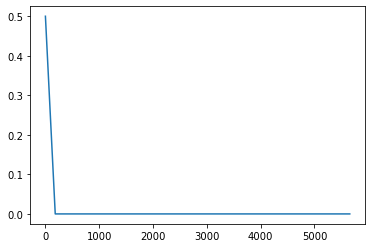

In [140]:
plt.plot(d, msk)

In [149]:
import numpy.ma as ma

In [150]:
ma.masked_outside

<module 'numpy.ma' from '/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/numpy/ma/__init__.py'>

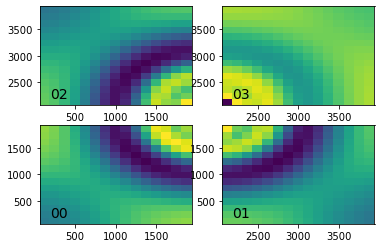

In [225]:
t = 15
x0 = 2000
y0 = 2000
for i in range(0, 4):
    k = (i+2)%4 + 1
    
    ax = plt.subplot(2,2,k)
    XX, YY = np.meshgrid(grid[f'x_{i}'], grid[f'y_{i}'])
    ax.pcolormesh(XX, YY, field[f'b_{i}'][t, 8, :, :])
    ax.text(XX[1,1],YY[1,1], f'{i:02d}', size=14)

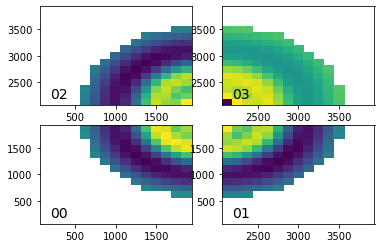

In [226]:
t = 15
x0 = 2000
y0 = 2000
for i in range(0, 4):
    k = (i+2)%4 + 1
    
    b = field[f'b_{i}'][t, 8, :, :]
    
    ax = plt.subplot(2,2,k)
    XX, YY = np.meshgrid(grid[f'x_{i}'], grid[f'y_{i}'])
    d = np.sqrt((XX - x0)**2 + (YY - y0)**2)
    mask = ma.masked_outside(d, 0, 1500)
    
    b_new = ma.masked_array(b, mask.mask)
    ax.pcolormesh(XX, YY, b_new)#field[f'b_{i}'][t, 8, :, :])
    ax.text(XX[1,1],YY[1,1], f'{i:02d}', size=14)

In [203]:
t = 140
x0 = 2000
y0 = 2000
n_levels = 16

means = np.zeros((n_levels))

for level in range(n_levels):
    #level = 6

    mean_level = 0
    for i in range(0, 4):

        r_max = 1500
        b = field[f'b_{i}'][t, level, :, :]
        k = (i+2)%4 + 1

        #ax = plt.subplot(2,2,k)
        XX, YY = np.meshgrid(grid[f'x_{i}'], grid[f'y_{i}'])
        r = np.sqrt((XX - x0)**2 + (YY - y0)**2)
        mask = ma.masked_outside(r, 0, r_max)
        b_new = ma.masked_array(b, mask.mask)
        mean_level += b_new.mean()

        #print(i, b.mean(), b_new.mean())
        #ax.pcolormesh(XX, YY, b_new)#field[f'b_{i}'][t, 8, :, :])
        #ax.text(XX[1,1],YY[1,1], i, size=14)

    means[level] = mean_level/4

print(means)


[-0.00426148 -0.00385398 -0.00334949 -0.0028466  -0.00219477 -0.00156046
 -0.00093521 -0.00030948  0.0003192   0.00093758  0.0015655   0.00218961
  0.00283915  0.00351104  0.00420451  0.00452876]


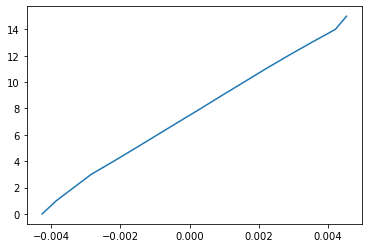

In [205]:
plt.plot(means, range(16))

In [ ]:
#field = {}
#grid = {}


for i in range(0,4):
    path = f'../../data/Nyles/plume_ref4/plume_ref4_{i:02d}_hist.nc'
    print(path)
    with Dataset(path, 'r') as nc:
        field[f'b_{i:01d}'] = nc['b'][:].data
        grid[f'x_{i:01d}'] = nc['x'][:].data
        grid[f'y_{i:01d}'] = nc['y'][:].data

In [227]:
var = 'b'
t = 140
x0 = 2000 # center point in the x domain
y0 = 2000 # center point in the y domain
n_levels = 16 
n_time = 145
r_max = 1500
means = np.zeros((n_time, n_levels))

for i in range(0, 4):
    path = f'../../data/Nyles/plume_ref4/plume_ref4_{i:02d}_hist.nc'
    
    with Dataset(path, 'r') as nc:
        field = nc[var][:].data
        x = nc['x'][:].data
        y = nc['y'][:].data
        
    XX, YY = np.meshgrid(x, y)
    r = np.sqrt((XX - x0)**2 + (YY - y0)**2)
    mask = ma.masked_outside(r, 0, r_max)

    for t in range(n_time):
        for level in range(n_levels):
            
            field_new = ma.masked_array(field[t, level, :, :], mask.mask)
            means[t, level] += field_new.mean()

means = means/4

    #print(means)


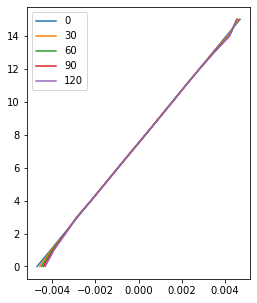

In [231]:
plt.figure(figsize=(4,5))
for t in range(0, 145, 30):
    plt.plot(means[t, :], range(16), label=t)
    
plt.legend()

In [250]:
var = 'b'
t = 140
x0 = 2000 # center point in the x domain
y0 = 2000 # center point in the y domain
n_levels = 16 
n_time = 145
r_max = 1500
means = np.zeros((n_time, n_levels))

for i in range(0, 4):
    path = f'../../data/Nyles/plume_ref4/plume_ref4_{i:02d}_hist.nc'
    
    with Dataset(path, 'r') as nc:
        field = nc[var][:].data
        x = nc['x'][:].data
        y = nc['y'][:].data
        
    XX, YY = np.meshgrid(x, y)
    r = np.sqrt((XX - x0)**2 + (YY - y0)**2)
    mask = ma.masked_outside(r, 0, r_max)

    for t in range(n_time):
        for level in range(n_levels):
            test_field = f(r)
            field_new = ma.masked_array(test_field, mask.mask)
            means[t, level] += field_new.mean()

means = means/4

In [252]:
means[0,:]

array([0.00266348, 0.00266348, 0.00266348, 0.00266348, 0.00266348,
       0.00266348, 0.00266348, 0.00266348, 0.00266348, 0.00266348,
       0.00266348, 0.00266348, 0.00266348, 0.00266348, 0.00266348,
       0.00266348])

In [238]:
f = lambda x: np.sin(x*5)

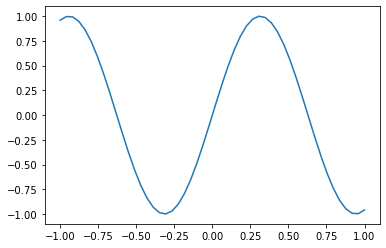

In [239]:
s = np.linspace(-1,1)
plt.plot(s, f(s))

In [241]:
f(s).mean()

8.881784197001253e-17

In [ ]:
def(file, )

var = 'b'
t = 140
x0 = 2000 # center point in the x domain
y0 = 2000 # center point in the y domain
n_levels = 16 
n_time = 145
r_max = 1500
means = np.zeros((n_time, n_levels))

for i in range(0, 4):
    path = f'../../data/Nyles/plume_ref4/plume_ref4_{i:02d}_hist.nc'
    
    with Dataset(path, 'r') as nc:
        field = nc[var][:].data
        x = nc['x'][:].data
        y = nc['y'][:].data
        
    XX, YY = np.meshgrid(x, y)
    r = np.sqrt((XX - x0)**2 + (YY - y0)**2)
    mask = ma.masked_outside(r, 0, r_max)

    for t in range(n_time):
        for level in range(n_levels):
            
            field_new = ma.masked_array(field[t, level, :, :], mask.mask)
            means[t, level] += field_new.mean()

means = means/4

    #print(means)
